# Flow Rate Data

Graph of flow rate data from San Diego River at Fashion Valley (USGS 11023000)

In [1]:
import pandas as pd
import numpy as np
import requests as req
from bokeh.plotting import figure, output_notebook, show
from datetime import datetime
import matplotlib.pyplot as plt

Get JSON file of the water data from USGS website

Documentation for formatting for json retrieval from USGS can be found at

<https://help.waterdata.usgs.gov/faq/automated-retrievals>

In [8]:
r = req.get('http://waterservices.usgs.gov/nwis/iv/?sites=11023000&period=P365D&parameterCd=00060&format=json')
data = r.json()

In [9]:
# TODO see if I can use list comprehension.
# df = pd.DataFrame(d['values'] for d in data['value']['timeSeries'])
# df = pd.DataFrame([[j['value'] for j in i['values']] for i in data['value']['timeSeries']])

In [10]:
cfs_data = []
for i in data['value']['timeSeries']:
    for j in i['values']:
        for k in j['value']:
            cfs_data.append(k)

cfs_df = pd.DataFrame(cfs_data)

In [11]:
# Convert strings into operable types
for idx, row in cfs_df.iterrows():
    # Remove ':' from timezone formatting
    datetime_stripped_str = row.dateTime[:-3] + row.dateTime[-2:]
    cfs_df.iloc[idx].dateTime = pd.to_datetime(datetime_stripped_str)
    cfs_df.iloc[idx].value = float(row.value)

In [12]:
cfs_df.plot(x='dateTime', y='value')

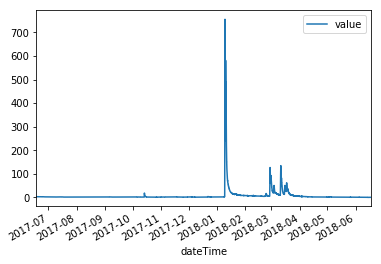

In [13]:
plt.show()